<a href="https://colab.research.google.com/github/AVJdataminer/Tunisia_hydro/blob/master/Download_Data_via_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Packages & find current working dir

In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
%matplotlib inline
print(os.getcwd())
os.listdir()

/Users/aidenjohnson/Library/Mobile Documents/com~apple~CloudDocs/Folio/Tunisia


['pluviometrie.xlsx',
 'stations_pluviometrie.xls',
 'Tunisia_EDA.py.ipynb',
 'Dams-to-Landsat.ipynb',
 '.pluviometrie.csv.icloud',
 '.DS_Store',
 'metadonnees_barrages.csv',
 'extractor.py',
 'img',
 'Dam_data_api.csv',
 'EDA.py',
 '.ipynb_checkpoints',
 'python_dam_api.py',
 'data',
 'def_formatLists.py',
 'barrages.csv']

### Download dam data using API
    * data will now be in a object named 'df'
    * additionally data is saved a csv file

In [0]:
#%run python_dam_api.py #you can also download the csv manually from the website
import urllib.request
import pandas as pd
import requests

req = urllib.request.Request('http://www.agridata.tn/api/3/action/datastore_search?resource_id=606ba3d0-e854-41a8-bb06-a417785b03aa')
with urllib.request.urlopen(req) as response:
    the_page = response.read()
#print(the_page)
#df=pd.DataFrame(the_page)
response = requests.get('http://www.agridata.tn/api/3/action/datastore_search?resource_id=8d70196c-a95e-4a04-9c61-8144b4b60a18&limit=100000')
#print(response.text)
#print('Status code: '+ str(response.status_code))
#print('Content Type: '+ str(response.headers['content-type']))
data=response.json()
#print(data)
repository = data['result']
#print(repository["resource_id"])
d=pd.DataFrame.from_dict(repository["records"])
print(d.shape)

#d.to_csv("Dam_data_api.csv", index=False)

In [0]:
df=pd.read_csv('Dam_data_api.csv')

In [0]:
#review summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annee_prod,11641.0,1987.693068,18.403534,1954.000000,1971.000000,1989.000000,2002.000000,2015.0000
Bassin_versant,11641.0,1184.101014,2574.659933,35.500000,85.900000,177.000000,855.000000,10300.0000
Cap_tot_act,11641.0,68.807438,107.539245,2.000000,12.854000,33.441100,76.900000,580.3500
Cap_tot_init,11641.0,89.449518,148.045498,4.000000,12.100000,41.000000,88.000000,814.0000
Cote,11641.0,210.762855,198.668592,18.040000,82.500000,122.500000,270.000000,849.0000
Latitude,11641.0,36.478721,0.597102,34.746800,36.302000,36.692300,36.882400,37.1991
Longitude,11641.0,9.501701,0.689284,8.531730,8.936180,9.410930,9.872350,10.9218
_id,11641.0,5821.000000,3360.611576,1.000000,2911.000000,5821.000000,8731.000000,11641.0000
apports,11641.0,0.213818,1.092895,-0.029971,0.000000,0.003904,0.049032,24.2202
cumul_annee_prec,10800.0,16.185759,34.566227,0.000000,0.406128,2.104285,14.703725,250.8460


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
#get date range for dataset
from datetime import datetime,date
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
min(df.Date) 
max(df.Date)
df['Date'] = pd.to_datetime(df['Date']).dt.date
st_date=min(df.Date).strftime("%Y-%m-%d") 
end_date=max(df.Date).strftime("%Y-%m-%d")

Timestamp('2018-05-28 00:00:00')

Timestamp('2019-05-26 00:00:00')

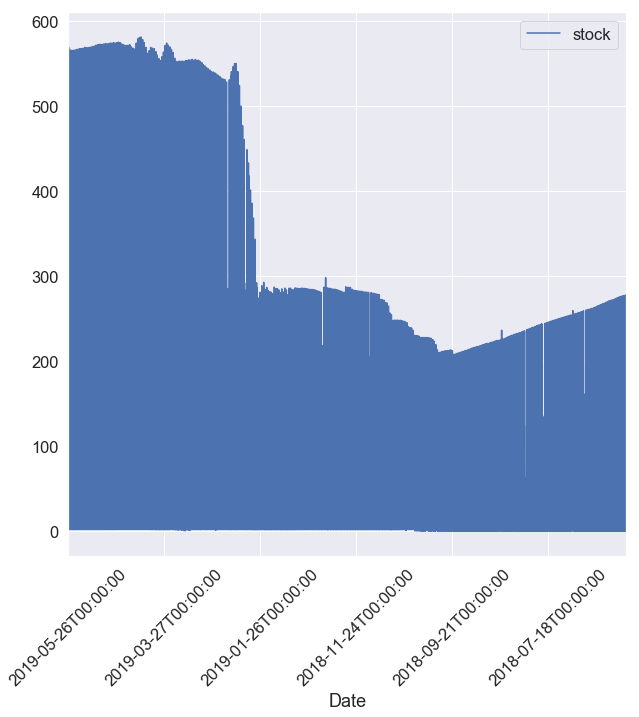

In [0]:
lines = df[['stock','Date']].set_index(df.Date).plot.line(figsize=(10,10), rot=45)

## Get list of lat and longs for Landsat data

In [0]:
lons=df['Longitude'].unique()
lats=df['Latitude'].unique()
lons[0]
lats[0]

8.70273

36.3144

### Search Landsat for data from first dam


In [0]:
import landsatxplore.api
from landsatxplore.earthexplorer import EarthExplorer
ee = EarthExplorer('AIDEN.DATAMINER@GMAIL.COM', 'SuperSecretPassword1')
# Initialize a new API instance and get an access key
api = landsatxplore.api.API('AIDEN.DATAMINER@GMAIL.COM', 'SuperSecretPassword1')

# Request
scenes = api.search(
    dataset='LANDSAT_8_C1',
    latitude=lats[0],
    longitude=lons[0],
    start_date=st_date,
    end_date=end_date,
    max_cloud_cover=10)

print('{} scenes found.'.format(len(scenes)))

scene_list=[]
for scene in scenes:
    print(scene['acquisitionDate'])
    print(scene['entityId'])
    print(scene['cloudCover'])
    scene_list.append(scene['entityId'])
   # ee.download(scene_id=scene['entityId'], output_dir='./data')

api.logout()
ee.logout()

11 scenes found.
2018-06-14
LC81920352018165LGN00
6.78
2018-06-30
LC81920352018181LGN00
0.03
2018-08-01
LC81920352018213LGN00
0.17
2018-09-02
LC81920352018245LGN00
4.34
2018-11-05
LC81920352018309LGN00
0.35
2018-11-21
LC81920352018325LGN00
0.03
2018-12-23
LC81920352018357LGN00
0.09
2019-02-09
LC81920352019040LGN00
1.19
2019-03-13
LC81920352019072LGN00
0.03
2019-04-14
LC81920352019104LGN00
6.53
2019-05-16
LC81920352019136LGN00
4.37


In [0]:
#unzip the tar.gz archives to a new directory
#%run extractor.py

In [0]:
#move the thermal files and metadata files to their own dir
import os, shutil, pathlib, fnmatch

def move_dir(src: str, dst: str, pattern: str = '*'):
    if not os.path.isdir(dst):
        pathlib.Path(dst).mkdir(parents=True, exist_ok=True)
    for f in fnmatch.filter(os.listdir(src), pattern):
        shutil.move(os.path.join(src, f), os.path.join(dst, f))
move_dir('./data/extracted/','./data/metadata/','*.txt')
move_dir('./data/extracted/','./data/qa/','*BQA.TIF')
move_dir('./data/extracted/','./data/thermal/','*B8.TIF')
move_dir('./data/extracted/','./data/thermal/','*B9.TIF')
move_dir('./data/extracted/','./data/thermal/','*B10.TIF')
move_dir('./data/extracted/','./data/thermal/','*B11.TIF')

['./data/LC08_L1TP_192035_20180411_20180417_01_T1.tar.gz', './data/LC08_L1TP_192035_20180614_20180703_01_T1.tar.gz', './data/LC08_L1TP_192035_20180630_20180716_01_T1.tar.gz']


In [0]:
#download rainfall data
rf=pd.read_csv('pluviometrie.csv')

In [0]:
rf.head()

,Date,station,Pluvio_du_jour,Cumul_du_mois,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente
0,2019-05-24,جندوبة,5.0,72.1,31.830000,589.1,416.921077,21.5,404.6
1,2019-05-24,بوسالم,4.0,33.9,27.426667,461.0,399.254344,17.4,389.3
2,2019-05-24,غار الدماء,2.0,49.5,36.819565,496.3,410.037174,42.1,387.3
3,2019-05-24,عين دراهم,10.0,116.0,75.270000,1369.0,1513.145692,158.0,1710.0
4,2019-05-24,طبرقة,15.0,38.0,37.674000,959.5,917.093385,94.9,1089.3
